In [1]:

## impports very important libraries run this cell first (TeaToCodeConverter)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sweetviz as sv
#import tensorflow as tf


/home/scv1alpha/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Data Imports

importing unlabeled  data as U1
importing labeled data as L1

In [2]:
## creating a custom missing value list
missing_values = ["NA","N/a",np.nan,"?"]


u1 = pd.read_csv("../../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None,na_values=missing_values)
l1 = pd.read_csv("../../DataSets/Breast cancer dataset/breast-cancer-wisconsin.data",header=None,na_values=missing_values, names=['id','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion','single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','diagnosis'])

##convert the bare_nuclei colmn to a number and drop the rows
#l1['bare_nuclei'] = pd.to_numeric(l1['bare_nuclei'],errors='coerce')

#check data is clean
l1.isnull().sum()
l1.head()

print(l1.dtypes)


id                               int64
clump_thickness                  int64
uniformity_of_cell_size          int64
uniformity_of_cell_shape         int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
diagnosis                        int64
dtype: object


In [3]:
l1.dtypes

id                               int64
clump_thickness                  int64
uniformity_of_cell_size          int64
uniformity_of_cell_shape         int64
marginal_adhesion                int64
single_epithelial_cell_size      int64
bare_nuclei                    float64
bland_chromatin                  int64
normal_nucleoli                  int64
mitoses                          int64
diagnosis                        int64
dtype: object

In [4]:
#Clean up the data
l1['diagnosis'].replace({2:0,4:1},inplace=True)
l1
## libary issued due to update
#analysis = sv.analyze(l1)
#analysis.show_html('EDA-Sweetviz2predrop.html', open_browser=False)

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,diagnosis
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


Sweetvis summary



In [5]:
# split the dataset
x=l1.drop('diagnosis',axis=1)
y=l1['diagnosis']
x



,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,1000025,5,1,1,1,2,1.0,3,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1
4,1017023,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1
695,841769,2,1,1,1,2,1.0,1,1,1
696,888820,5,10,10,3,7,3.0,8,10,2
697,897471,4,8,6,4,3,4.0,10,6,1


In [6]:
# Summary of the dataset

#analysis = sv.analyze(l1, target_feat='diagnosis')
#analysis.show_html('EDA-Sweetviz2.html', open_browser=False)


In [7]:
#Dislay resuls in the notebook
import IPython
ip = IPython.display.IFrame(src='EDA-Sweetviz2.html', width=1000, height=600)


# using Sklearn to diagnosisify the diagnosis data and plot some graphs

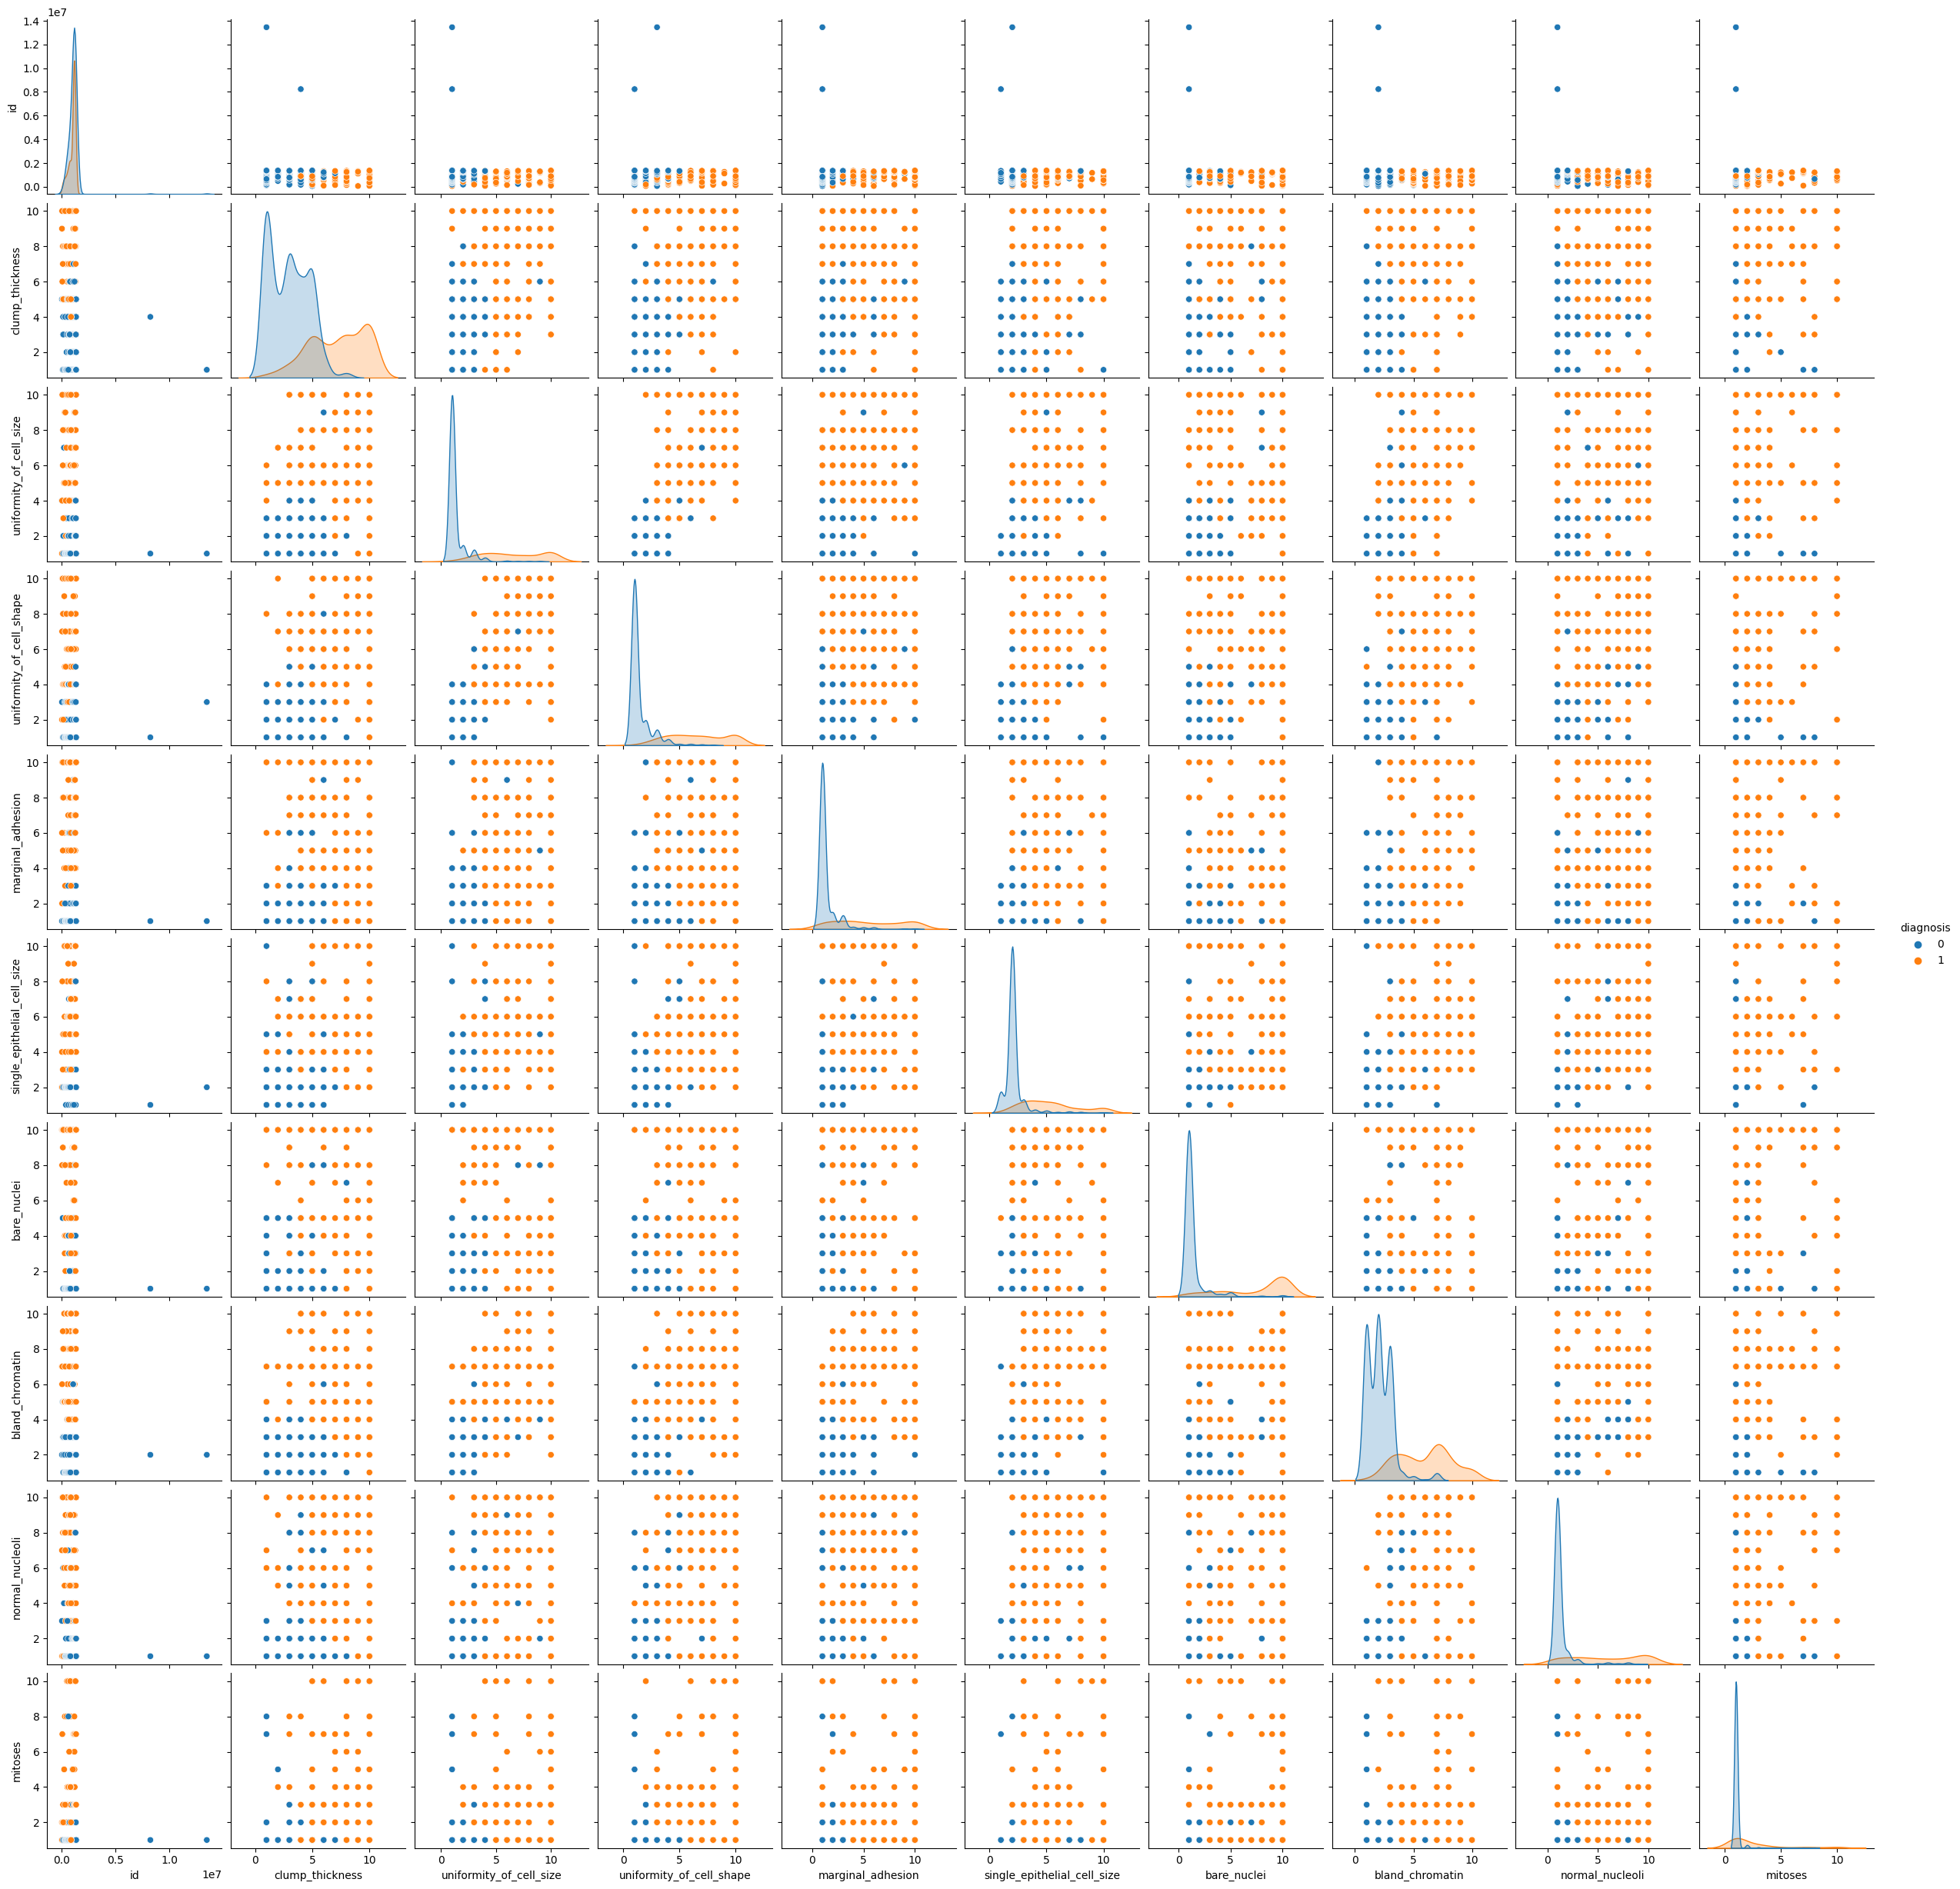

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
l1.diagnosis = labelencoder_y.fit_transform(l1.diagnosis.values)

sns.pairplot(l1, hue='diagnosis')

#reencode entire dataframe
l1 = l1.apply(LabelEncoder().fit_transform)

<AxesSubplot: >

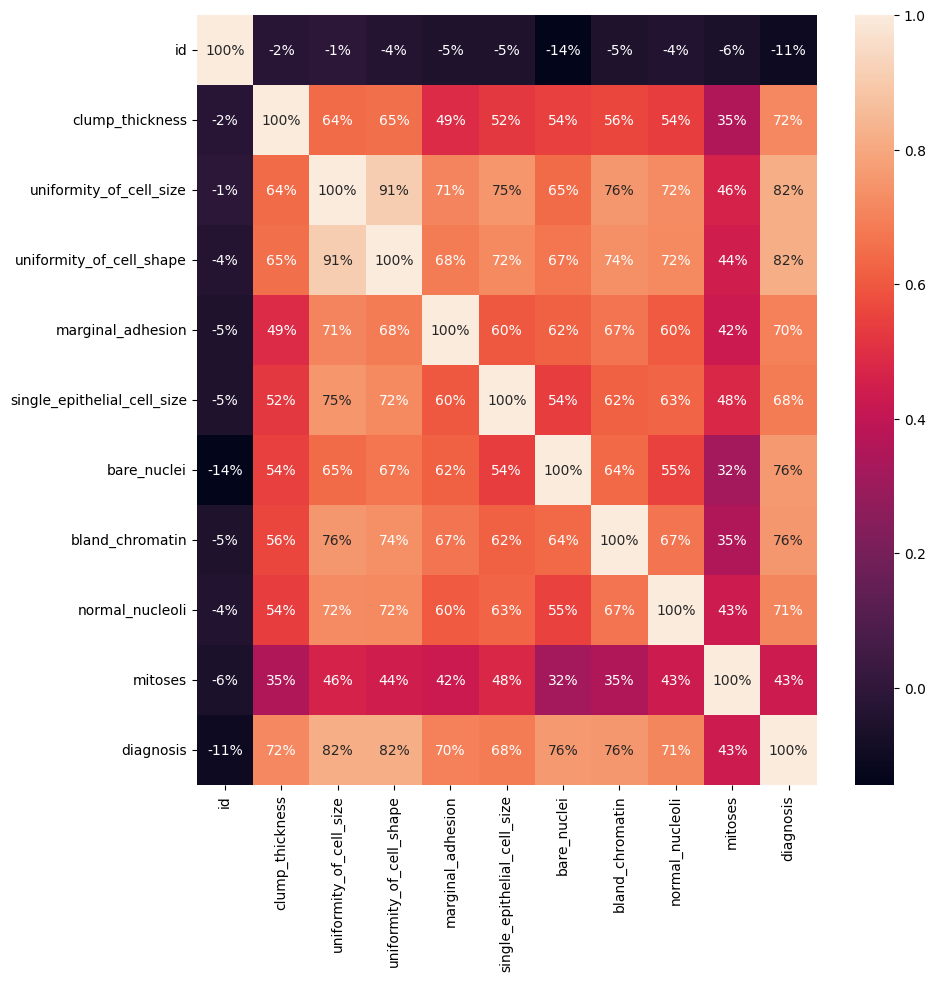

In [9]:
#get the correlation of the columns
l1.corr()

#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(l1.corr(), annot=True, fmt='.0%')

# Splitting the data into training and testing sets

In [10]:
# split the data into independent 'X' and dependent 'Y' variables

X=l1.drop('diagnosis',axis=1)

Y=l1['diagnosis']

# Splitting the data into training and testing sets


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [12]:
#without scaling funtion for the models
def models(X_train,Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #Decision Tree
    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
    dtcRender = dtc.fit(X_train, Y_train) 

    
    #Random Forest diagnosisifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    #print model accuracy on the training data.

    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]Decision Tree diagnosisifier Training Accuracy:', dtc.score(X_train, Y_train))
    print('[2]Random Forest diagnosisifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, dtc, dtcRender, forest




In [13]:
#Getting all of the models
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy: 0.9677996422182469
[1]Decision Tree diagnosisifier Training Accuracy: 1.0
[2]Random Forest diagnosisifier Training Accuracy: 0.9946332737030411


In [14]:
#test model accuracy on test data on confusion matrix for the models

from sklearn.metrics import confusion_matrix
for i in model:
    print('Model ', i)
    cm = confusion_matrix(Y_test, i.predict(X_test))
    #TN, FP, FN, TP variables
    TP = cm[0][0]
    TN = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]

    print(cm)
    ## really important to formula it is the accuracy of the model
    print('Testing Accuracy = "{}!"'.format( (TP + TN) / (TP + TN + FN + FP)))
    

Model  LogisticRegression(random_state=0)
[[82  3]
 [ 1 54]]
Testing Accuracy = "0.9714285714285714!"
Model  DecisionTreeClassifier(criterion='entropy', random_state=0)
[[82  3]
 [ 8 47]]
Testing Accuracy = "0.9214285714285714!"
Model  DecisionTreeClassifier(criterion='entropy', random_state=0)
[[82  3]
 [ 8 47]]
Testing Accuracy = "0.9214285714285714!"
Model  RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
[[82  3]
 [ 3 52]]
Testing Accuracy = "0.9571428571428572!"


In [15]:
#testing from other libaries

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ', i)
    # Check precision, recall, f1-score
    print( classification_report(Y_test, model[i].predict(X_test)) )
    # Another way to get the models accuracy on the test data
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.95      0.98      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

0.9714285714285714

Model  1
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        85
           1       0.94      0.85      0.90        55

    accuracy                           0.92       140
   macro avg       0.93      0.91      0.92       140
weighted avg       0.92      0.92      0.92       140

0.9214285714285714

Model  2
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        85
           1       0.94      0.85      0.90        55

    accuracy                           0.92       140
   macro avg       0.93      0.91      0.92       140
weighte

#classisify the data using the random forest classisifier

In [17]:
pred=model[2].predict(X_test)
print(pred.tolist())
print()
print(Y_test.tolist())


[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]

[0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0]


In [18]:
#visualizing the desicion tree
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

features = list(l1.columns[1:])

## export to a file (png,pdf)
#export_graphviz(model[1],out_file='dtree.png')

In [19]:
#print(dtc)
print(dir(model[1]))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_X_predict', '_validate_data', '_validate_params', 'apply', 'ccp_alpha', 'class_weight', 'classes_', 'cost_complexity_pruning_path', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

#tree.plot_tree(model[1])
#tree.png
## plot the tree
#tree.plot_tree(model[1],feature_names=features,filled=True)



## export to a file (dot)
tree.export_graphviz(model[1],out_file='dtree.dot',feature_names=features,filled=True)
## convert the tree to a pdf

dot_data = tree.export_graphviz(model[1],out_file=None,feature_names=features,filled=True)
graph = graphviz.Source(dot_data)
#import os

graph.render("dtree_render",view=False)


'dtree_render.pdf'

# Comparison report

In [21]:
## Dosnt work due to libary issues

compare_report = sv.compare([X_train, 'Train'], [X_test, 'Test'], 'diagnosis')
compare_report.show_html('EDA-Sweetviz-Compare2.html', open_browser=False)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'